In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
census=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Checking the shape of the dataset-

print("Number of rows in the dataset: ",census.shape[0])
print("Number of columns in the dataset: ",census.shape[1])

Number of rows in the dataset:  32560
Number of columns in the dataset:  15


In [4]:
census.columns.to_list()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [5]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There is object and integer data type present in the dataset. There are no null values in dataset.

In [6]:
numerical_cols=[]
for i in census.dtypes.index:
    if census.dtypes[i]=='int64':
        numerical_cols.append(i)
    
categorical_cols=[]
for i in census.dtypes.index:
    if census.dtypes[i]=='object':
        categorical_cols.append(i)

print('Numerical column: ',numerical_cols,'\n')
print('Categorical column: ',categorical_cols)

Numerical column:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'] 

Categorical column:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [7]:
census.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [8]:
for i in census.columns:
    if census[i].dtypes =='object':
        print(i,'\n',census[i].value_counts())
        print('=='*50)

Workclass 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education 
  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Marital_status 
  Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation 
  Prof-specialty 

In [9]:
#replacing ? with mode values
mode_col = ['Workclass','Occupation','Native_country']
for i in mode_col:
    census[i].replace("?",census[i].mode()[0],inplace = True)

In [10]:
census.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
12880,17,Private,96282,10th,6,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
2247,20,Private,236769,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
24736,67,Private,336163,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,24,United-States,<=50K
11618,51,Private,177727,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,>50K
22771,35,Private,90406,11th,7,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K
17552,30,Private,203488,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,44,United-States,<=50K
21469,55,Self-emp-not-inc,68006,7th-8th,4,Never-married,Other-service,Other-relative,White,Female,0,0,60,United-States,<=50K
25098,22,?,61499,HS-grad,9,Never-married,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
17677,46,Local-gov,175754,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,1876,60,United-States,<=50K
9024,27,Private,161683,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,42,United-States,<=50K


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


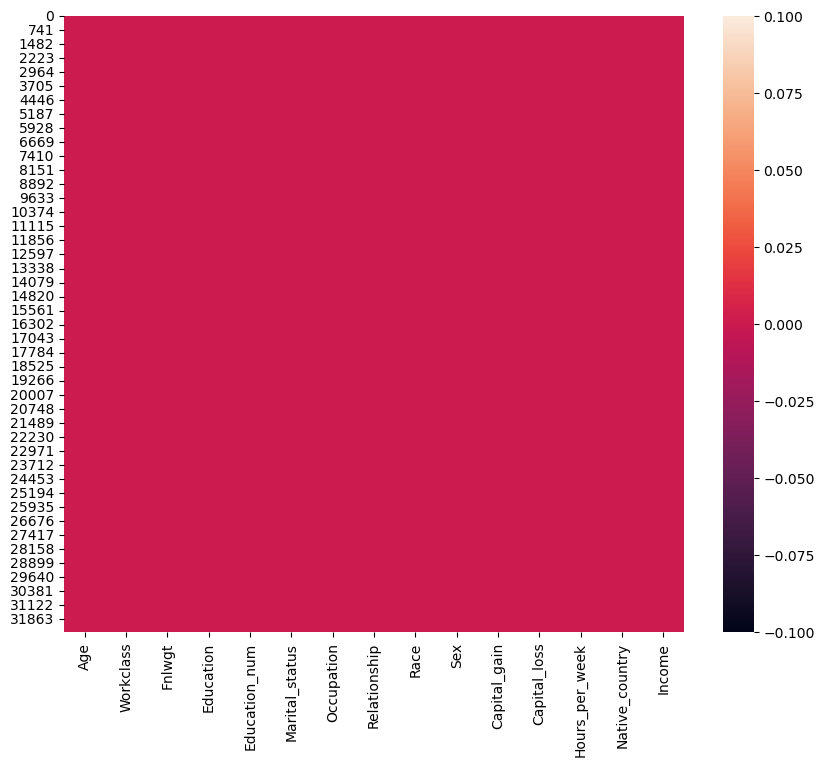

In [11]:
plt.figure(figsize=[10,8])
sns.heatmap(census.isnull())
print(census.isnull().sum())

In [12]:
census.duplicated().sum()

24

There are 24 duplicate values. 

In [13]:
#Deleting duplicate data in the given dataset
census.drop_duplicates(inplace=True)
census.shape

(32536, 15)

In [14]:
census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The mean is greater than median in all the columns , which indicates that the data is right sided skewed .
75% of the population is below 48 years of age.
The difference between 75% and max values is also very large, which shows presence of outliers in our dataset.
Many zero values in the capital_gain and capital_loss column. It might suggests abnormality in both the columns
The Minimum age is 17 and maximum age is 90.
The average working hours per week is 40 hours.

In [15]:
# checking zero count 
zero_col = ['Capital_loss','Capital_gain']
for i in zero_col:
    print(census[census[i]==0].count(),'\n')

Age               31017
Workclass         31017
Fnlwgt            31017
Education         31017
Education_num     31017
Marital_status    31017
Occupation        31017
Relationship      31017
Race              31017
Sex               31017
Capital_gain      31017
Capital_loss      31017
Hours_per_week    31017
Native_country    31017
Income            31017
dtype: int64 

Age               29825
Workclass         29825
Fnlwgt            29825
Education         29825
Education_num     29825
Marital_status    29825
Occupation        29825
Relationship      29825
Race              29825
Sex               29825
Capital_gain      29825
Capital_loss      29825
Hours_per_week    29825
Native_country    29825
Income            29825
dtype: int64 



Data Visualisation

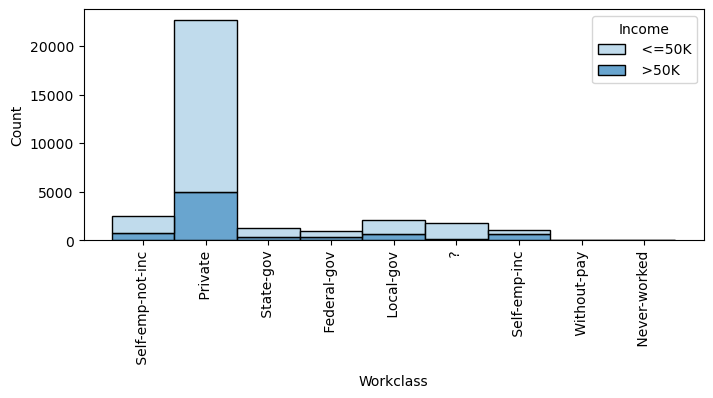

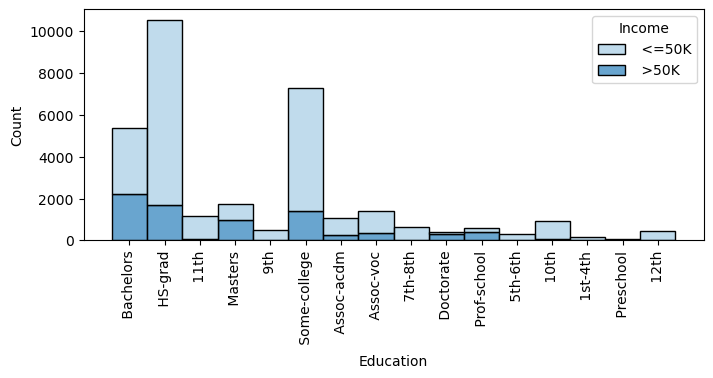

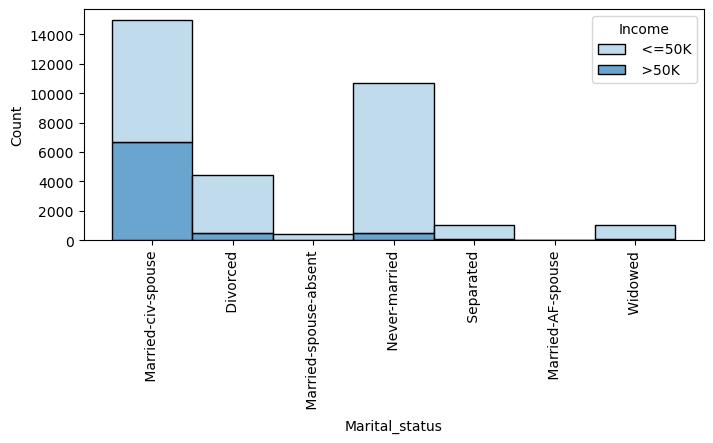

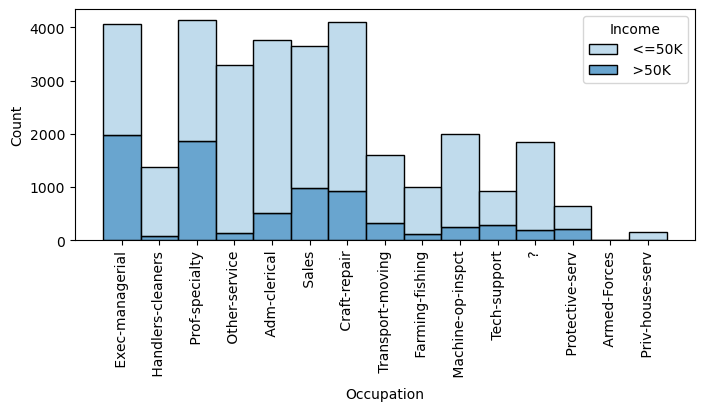

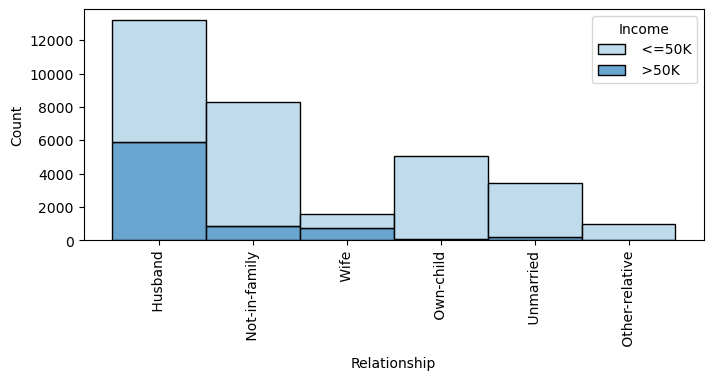

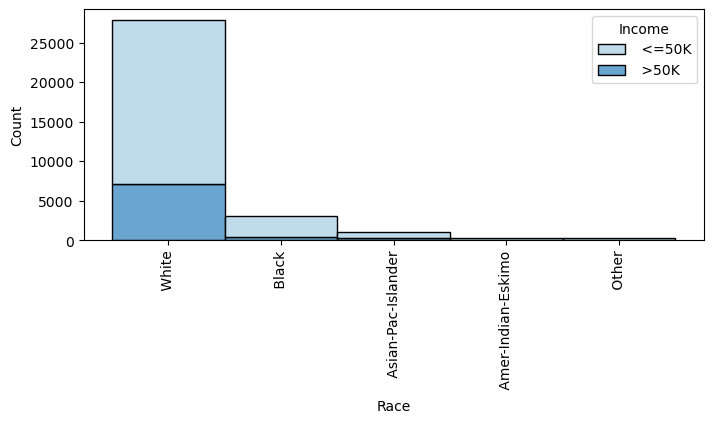

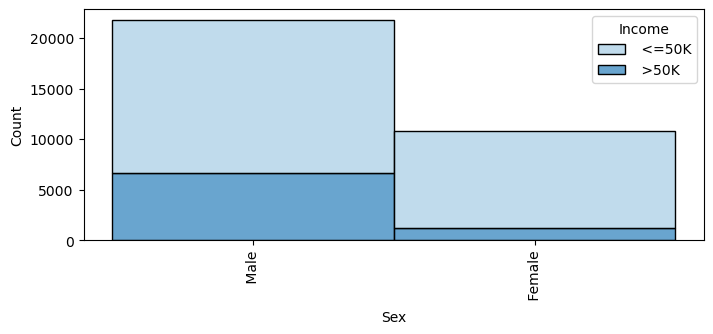

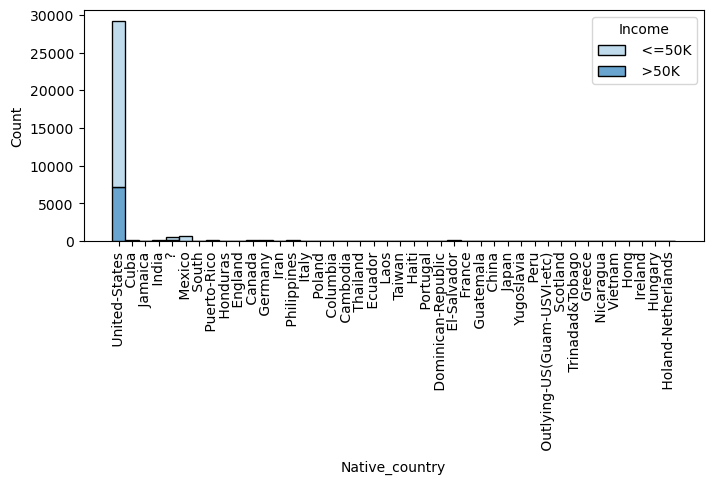

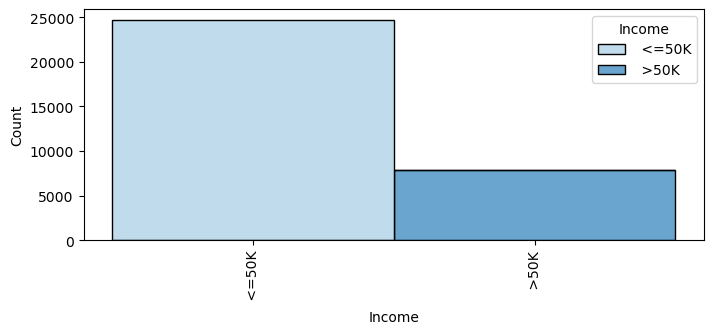

In [16]:
for i in categorical_cols:
    plt.figure(figsize=(8,3))
    sns.histplot(x=census[i],palette='Blues',multiple="stack",hue=census['Income'])
    plt.xticks(rotation=90)
    plt.show()

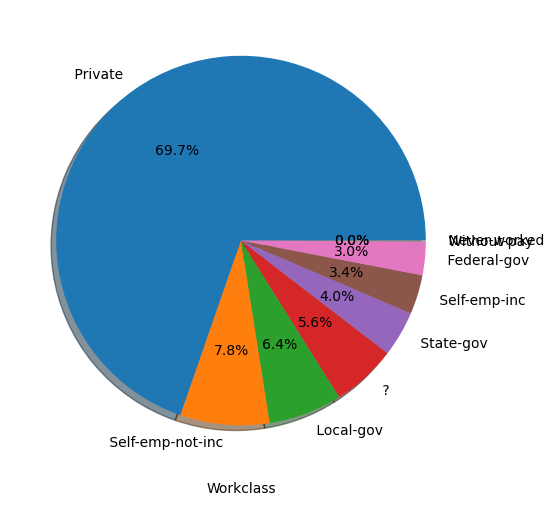

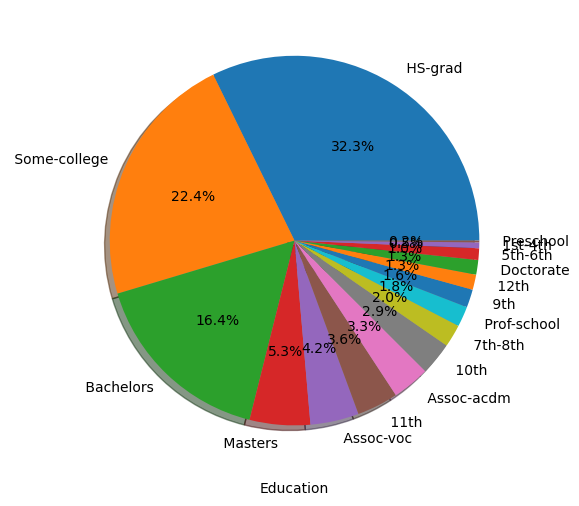

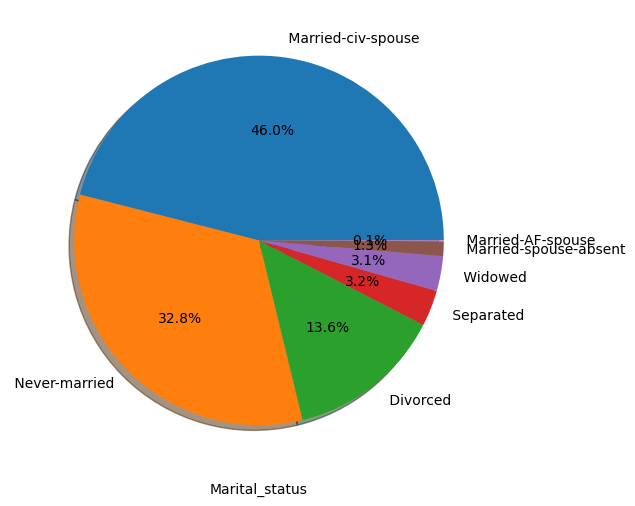

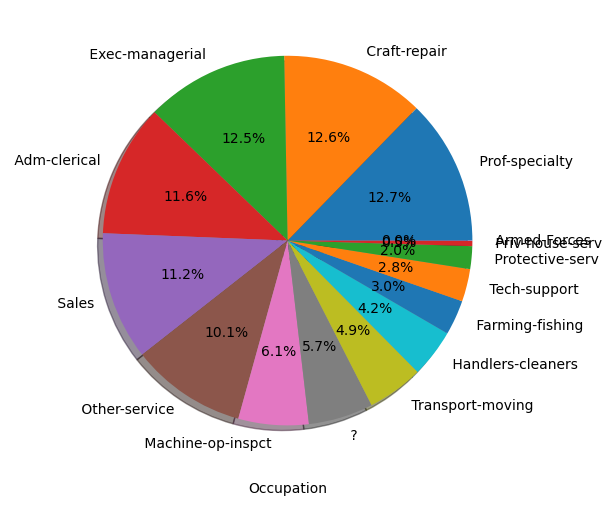

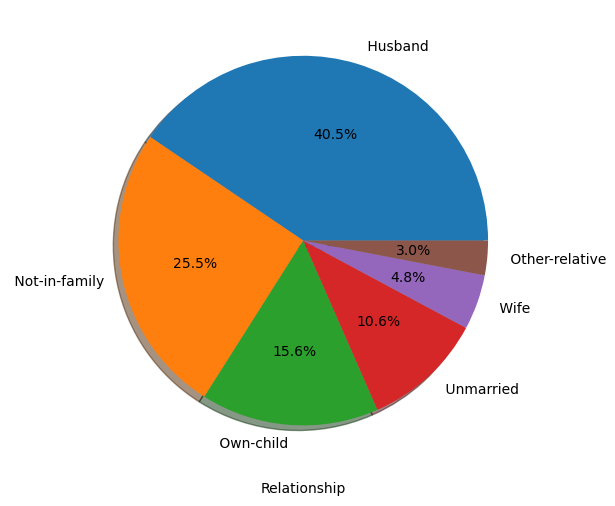

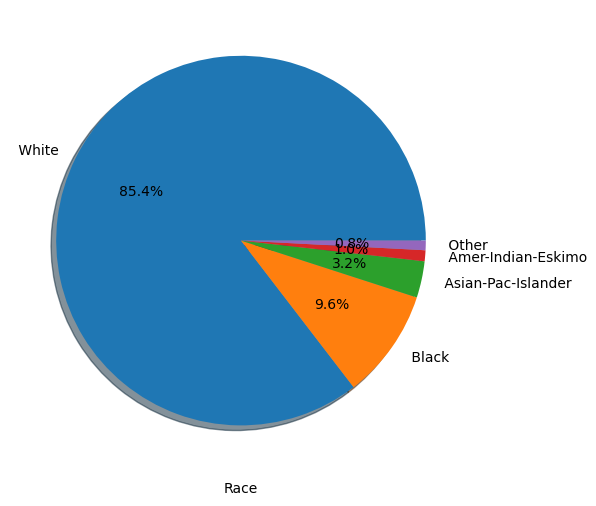

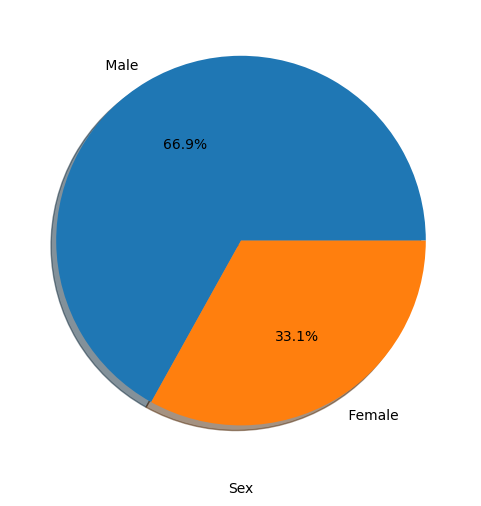

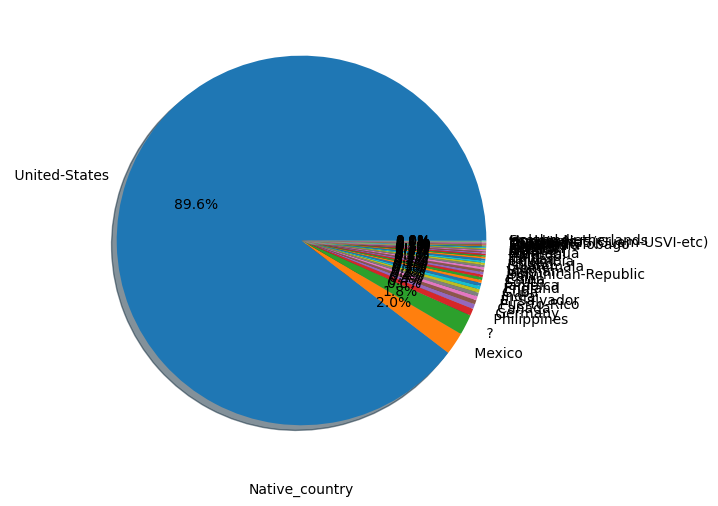

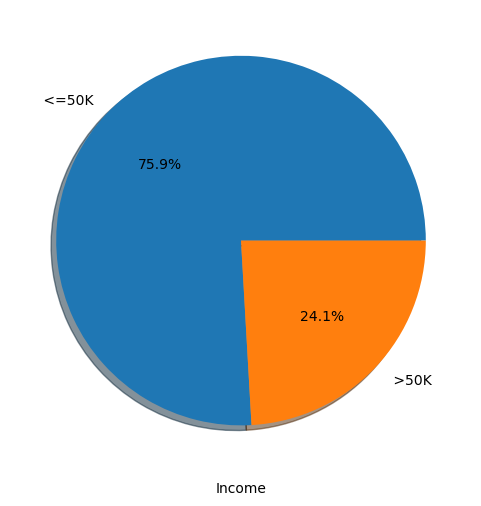

In [17]:
for i in categorical_cols:
    plt.figure(figsize=(15,6))
    census[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
    plt.xlabel(i)
    plt.ylabel('')
    plt.show()

More than 69.7 % of the population works in a Private company than any other local or government organizations.
More than 46% of the population are married and 32% never married.
The count of individuals working as a Prof-specialty> Craft-repair > Exec-managerial > Adm-clerical > Sales > Other-service.
The count of individuals as husband> not-in-family.
More than 85% of population are white in color and only approx 10% are black colored.
67% are male population and 33% are female population.
More than 90% working professionals are US citizens.
Almost 76% have income less than $50k per year.Hence target variable is imbalanced
Most of the population has completed high school graduation > some community-college>bachelor people.

<AxesSubplot:xlabel='Age', ylabel='count'>

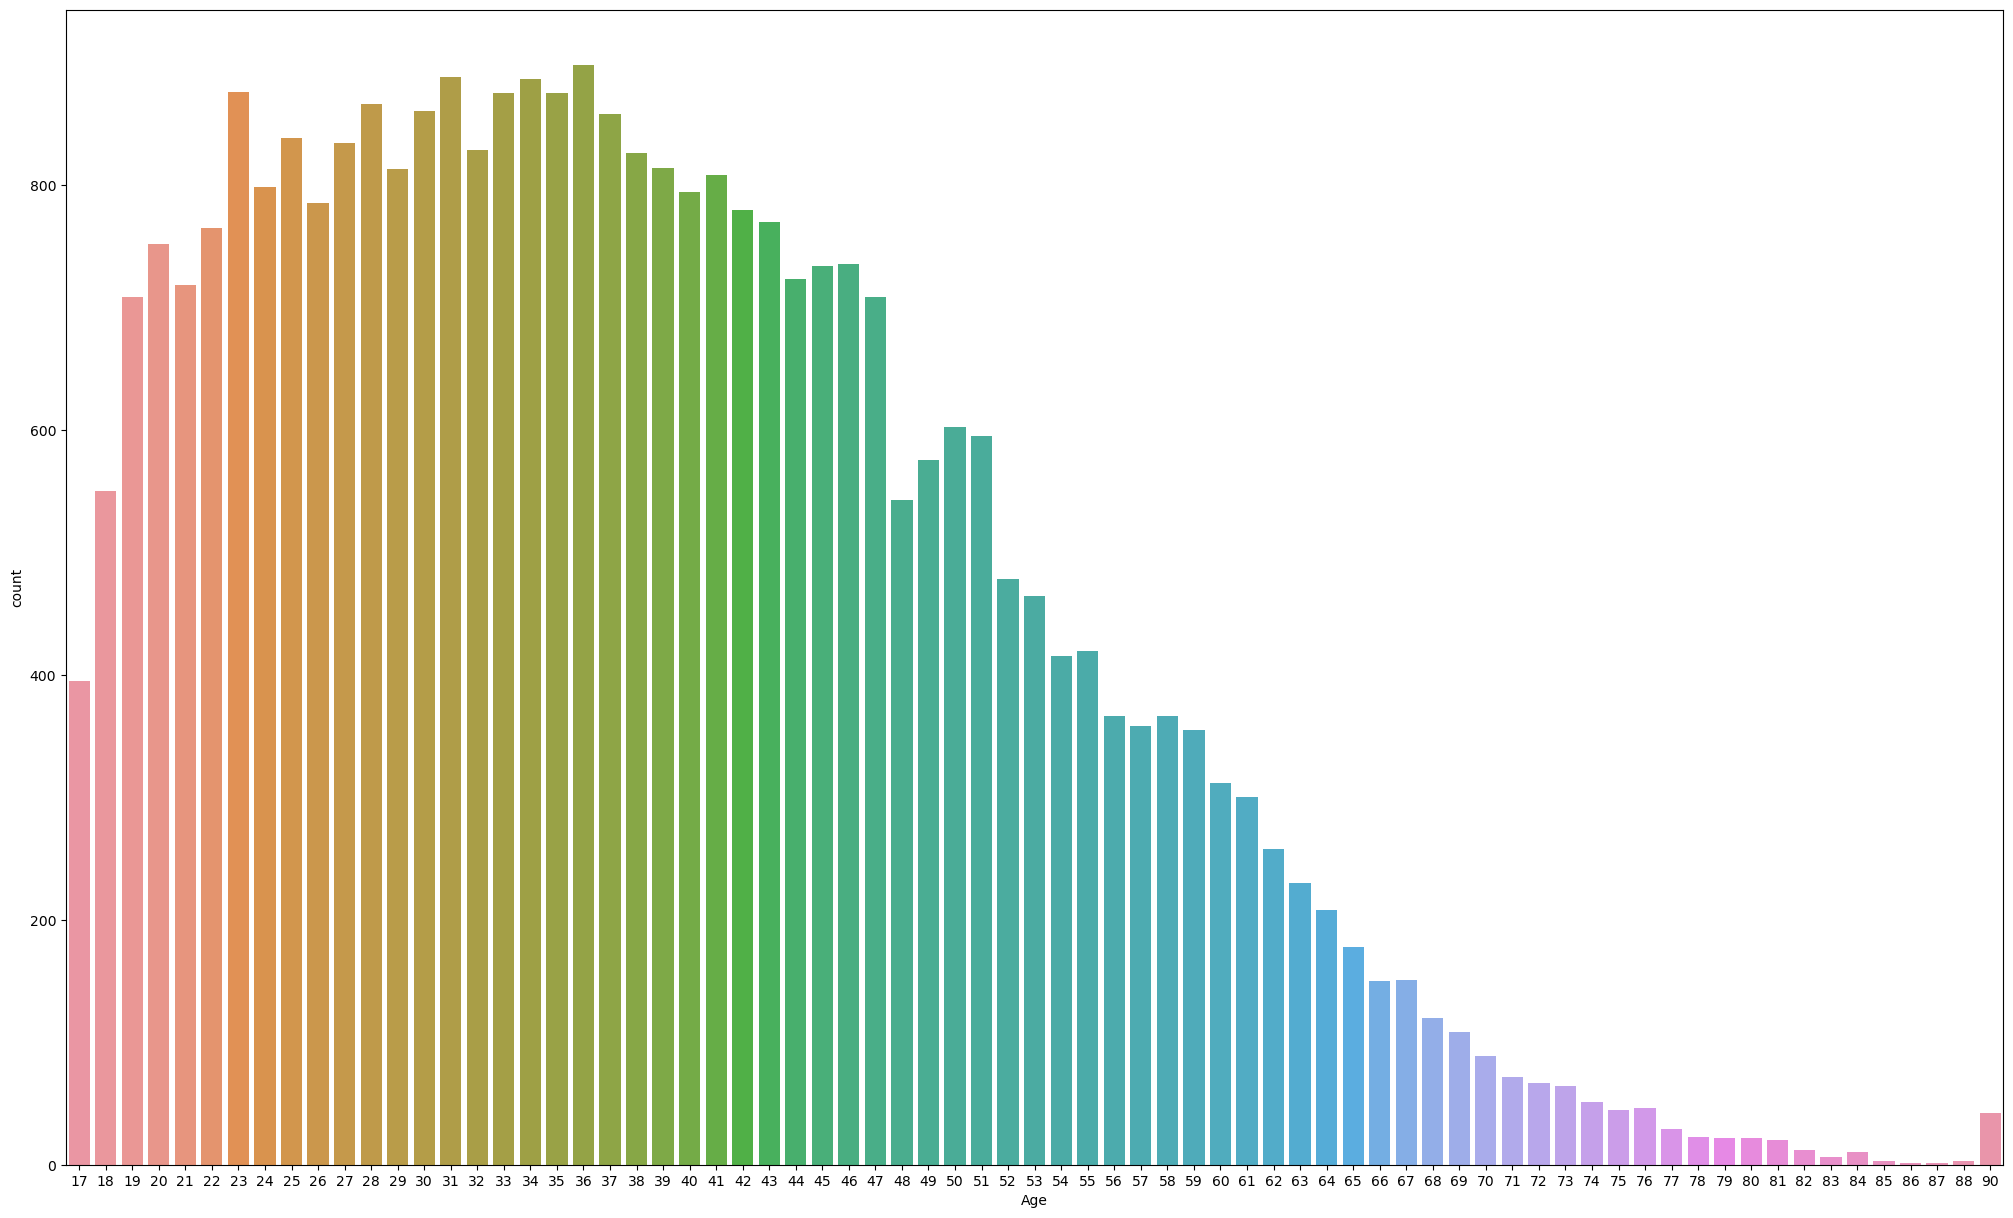

In [18]:
plt.figure(figsize = [25,15])
sns.countplot(x=census.Age)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  

In [35]:
for i in census.columns:
    if census[i].dtypes == "object":
        census[i] = le.fit_transform(census[i].values.reshape(-1,1))
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


<AxesSubplot:>

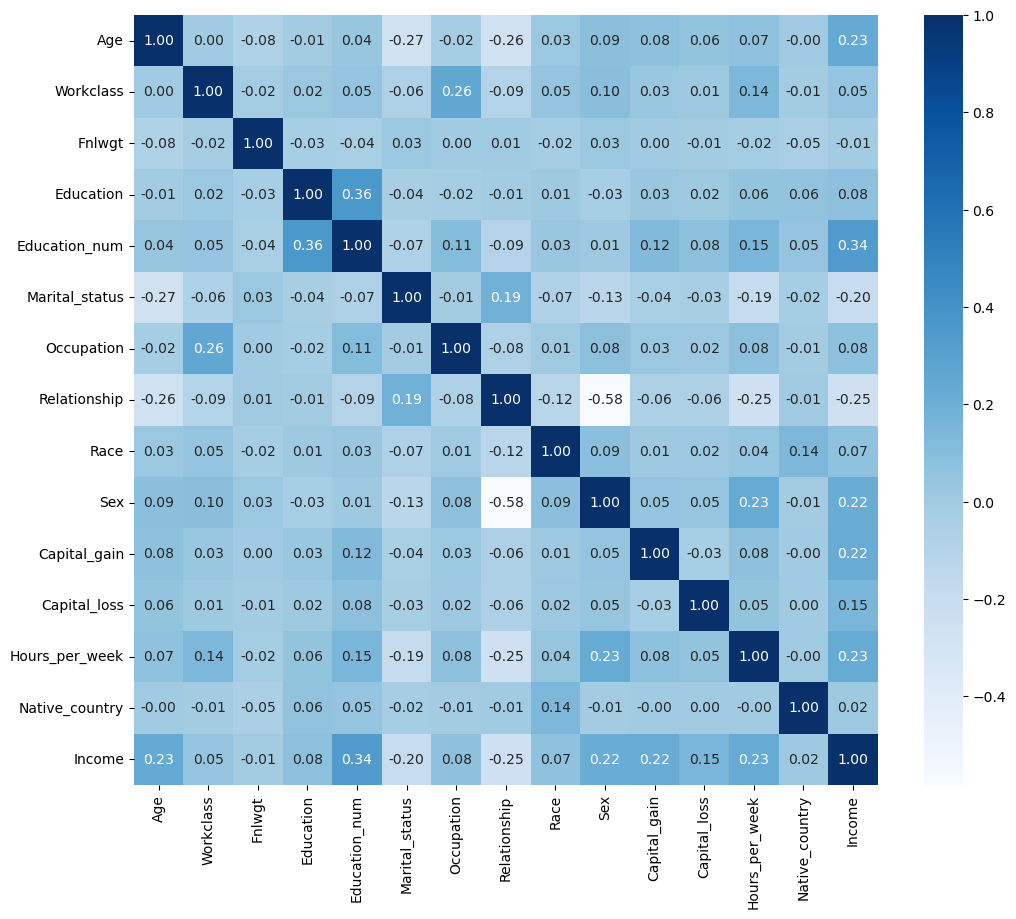

In [36]:
#Plotting the correlation of columns
plt.figure(figsize=[12,10])
sns.heatmap(census.corr(),annot = True, fmt = '0.2f',cmap='Blues')

Education_num     0.335299
Age               0.234039
Hours_per_week    0.229659
Capital_gain      0.223340
Sex               0.215984
Capital_loss      0.150498
Education         0.079361
Occupation        0.075398
Race              0.071855
Workclass         0.051706
Native_country    0.015623
Fnlwgt           -0.009521
Marital_status   -0.199187
Relationship     -0.250955
Name: Income, dtype: float64


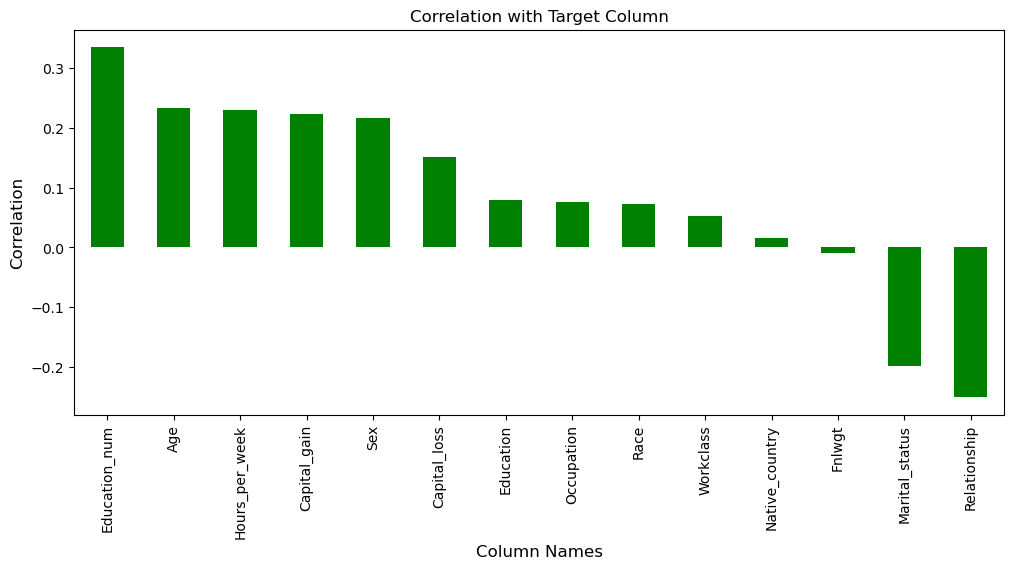

In [37]:
print(census.corr()['Income'].drop('Income').sort_values(ascending = False))
plt.figure(figsize = [12,5])
census.corr()['Income'].sort_values(ascending= False).drop('Income').plot(kind = 'bar', color ='green')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()


The column 'Education_num','Age','Hours_per_week' is having highest positve correlation with the target variable 'Income'.
The columm 'Fnlwgt', 'Marital_status'and 'Relationship' is having highest negative correlation with the target variable 'Income' while rest others are in correlation with target variable .
The column 'Workclass' is having least positve correlation to the target variable 'Income'. The column 'Fnlwgt' is having least negative correlation to the target variable 'Income'.

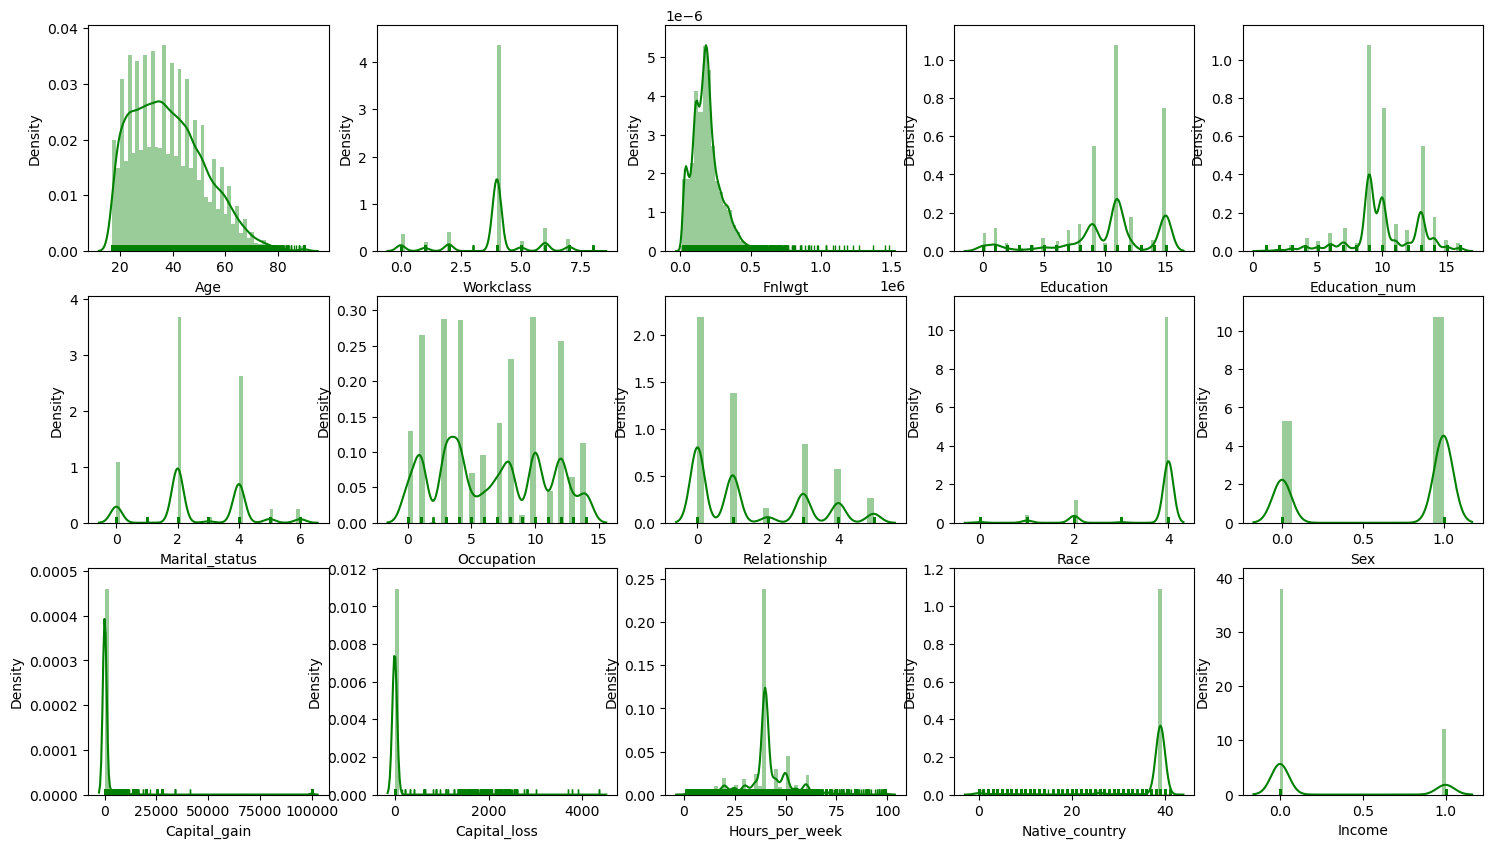

In [38]:
plt.figure(figsize=(18,10))
plot=1
for col in census:
    if plot<=15:
        plt.subplot(3,5,plot)
        sns.distplot(census[col],color='green', rug=True)
        plt.xlabel(col)
        plot=plot+1
plt.show()

Almost all the data is skewed .Non of the data is normally distributed.
Age and Fnlwgt are right skewed.
Education_num,Education,marital status,Occupation,Relationship has variation, which need to be treated.
captital_gain & Capital_loss are highly right skewed with majority values are zero.
Although Hours_per_week seems Normal Distributed but it shows some variation in so, we need to treat.

In [39]:
#checking the skewness
census.skew().sort_values(ascending = False)

Capital_gain      11.949245
Capital_loss       4.592622
Fnlwgt             1.447695
Income             1.211640
Relationship       0.786514
Age                0.557657
Hours_per_week     0.228752
Occupation         0.114542
Marital_status    -0.012692
Education_num     -0.309454
Sex               -0.719400
Workclass         -0.751854
Education         -0.934180
Race              -2.435283
Native_country    -3.661060
dtype: float64

- The columns 'Capital_gain', 'Capital_loss', 'Fnlwgt', 'Income' are having high positive skewness. The columns 'Native_country', 'Race' are having high negative skewness. we can ignore the column 'Income' as it is our target column

In [42]:
### STEP-2 Removing skewness 

#Removing skewness from the data with standard limit as +/-0.5. -
census.skew().sort_values(ascending=False)[np.abs(census.skew())>0.5]

Capital_gain      11.949245
Capital_loss       4.592622
Fnlwgt             1.447695
Income             1.211640
Relationship       0.786514
Age                0.557657
Sex               -0.719400
Workclass         -0.751854
Education         -0.934180
Race              -2.435283
Native_country    -3.661060
dtype: float64

In [44]:
# Importing library to remove skewness .
from sklearn.preprocessing import power_transform
def skew(col):
    census[col]=power_transform((census[col].values.reshape(-1,1)))
    
skewed_col = ['Capital_gain','Capital_loss','Fnlwgt','Relationship','Education','Race','Native_country']
for col in skewed_col:
    skew(col)

In [45]:
census.skew()

Age               0.557657
Workclass        -0.751854
Fnlwgt            0.016961
Education        -0.309379
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.114542
Relationship      0.123000
Race             -2.010646
Sex              -0.719400
Capital_gain      3.015495
Capital_loss      4.297677
Hours_per_week    0.228752
Native_country   -2.728041
Income            1.211640
dtype: float64

In [46]:
census.drop(['Capital_loss','Capital_gain'],axis = 1, inplace = True)
census.skew().sort_values(ascending = False)

Income            1.211640
Age               0.557657
Hours_per_week    0.228752
Relationship      0.123000
Occupation        0.114542
Fnlwgt            0.016961
Marital_status   -0.012692
Education        -0.309379
Education_num    -0.309454
Sex              -0.719400
Workclass        -0.751854
Race             -2.010646
Native_country   -2.728041
dtype: float64

Age                   AxesSubplot(0.125,0.77;0.110714x0.11)
Workclass          AxesSubplot(0.257857,0.77;0.110714x0.11)
Fnlwgt             AxesSubplot(0.390714,0.77;0.110714x0.11)
Education          AxesSubplot(0.523571,0.77;0.110714x0.11)
Education_num      AxesSubplot(0.656429,0.77;0.110714x0.11)
Marital_status     AxesSubplot(0.789286,0.77;0.110714x0.11)
Occupation           AxesSubplot(0.125,0.638;0.110714x0.11)
Relationship      AxesSubplot(0.257857,0.638;0.110714x0.11)
Race              AxesSubplot(0.390714,0.638;0.110714x0.11)
Sex               AxesSubplot(0.523571,0.638;0.110714x0.11)
Capital_gain      AxesSubplot(0.656429,0.638;0.110714x0.11)
Capital_loss      AxesSubplot(0.789286,0.638;0.110714x0.11)
Hours_per_week       AxesSubplot(0.125,0.506;0.110714x0.11)
Native_country    AxesSubplot(0.257857,0.506;0.110714x0.11)
Income            AxesSubplot(0.390714,0.506;0.110714x0.11)
dtype: object

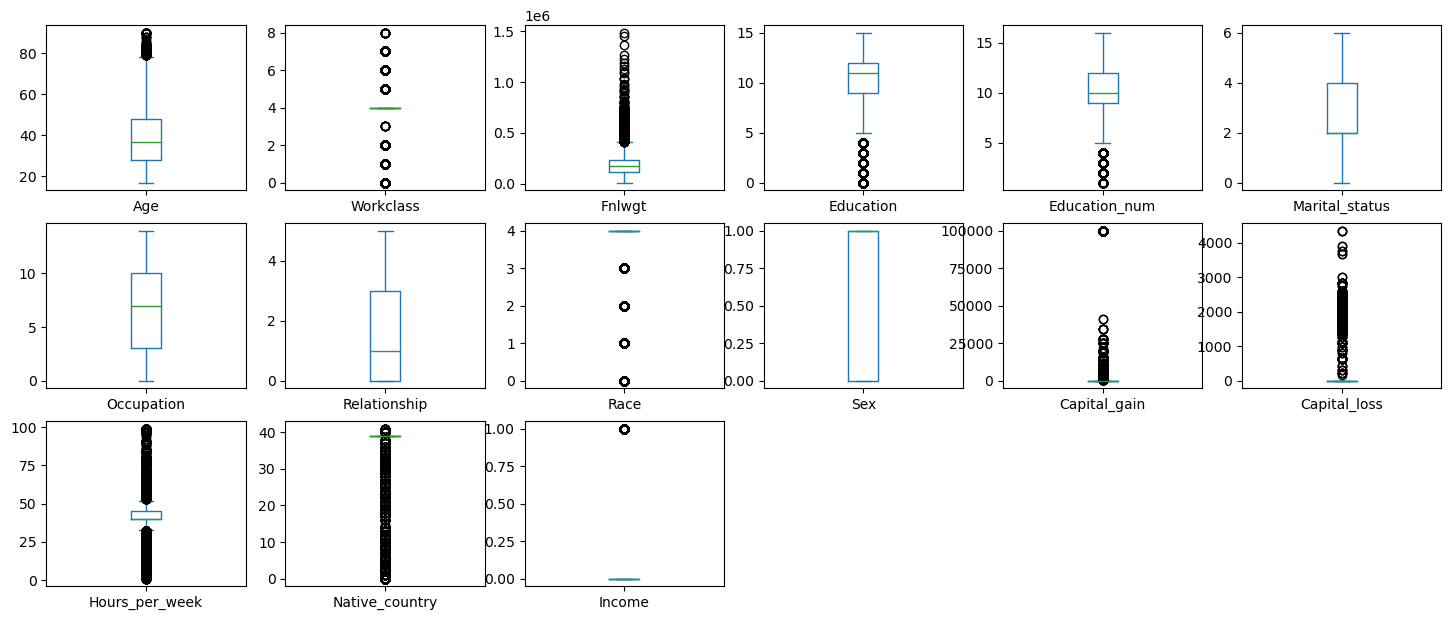

In [41]:
#detecting outliers
census.plot(kind='box',subplots=True,layout=(6,6),figsize=(18,15))

outliers are present in all columns except the columns 'Marital_status', 'Occupation', 'Relationship', 'Sex'.
The categorical columns 'Work class', 'Education', 'Race', 'Native_country','Income' can be ignored.

In [47]:
from scipy.stats import zscore
z = np.abs(zscore(census))
threshold = 3
df= census[(z<3).all(axis=1)]

In [48]:
df.shape

(29766, 13)

In [50]:
census.shape

(32536, 13)

In [52]:
data_loss = (census.shape[0]-df.shape[0])/census.shape[0]*100
data_loss

8.51364642242439

In [53]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6,-1.089960,-0.476830,13,2,4,-1.094450,0.412918,1,13,0.328812,0
1,38,4,0.398771,0.090708,9,0,6,0.134548,0.412918,1,40,0.328812,0
2,53,4,0.562562,-2.067623,7,2,6,-1.094450,-2.431782,1,40,0.328812,0
4,37,4,0.957178,0.395380,14,2,4,1.548769,0.412918,0,40,0.328812,0
6,52,6,0.345485,0.090708,9,2,4,-1.094450,0.412918,1,45,0.328812,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,0.746761,-0.984585,12,2,13,1.548769,0.412918,0,38,0.328812,0
32556,40,4,-0.193274,0.090708,9,2,7,-1.094450,0.412918,1,40,0.328812,1
32557,58,4,-0.219732,0.090708,9,6,1,1.351188,0.412918,0,40,0.328812,0
32558,22,4,0.271699,0.090708,9,4,1,1.090940,0.412918,1,20,0.328812,0


In [54]:
x = df.drop('Income',axis = 1)
y = df['Income']
z = x.columns
print(x.shape)
print(y.shape)

(29766, 12)
(29766,)


In [55]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = z)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.877253,1.468802,-1.090104,-0.497091,1.181554,-0.398771,-0.603010,-1.097533,0.390825,0.706786,-2.423681,0.194453
1,-0.020764,0.092368,0.425291,0.073631,-0.462813,-1.723526,-0.132218,0.130259,0.390825,0.706786,-0.006353,0.194453
2,1.101757,0.092368,0.592016,-2.096810,-1.284997,-0.398771,-0.132218,-1.097533,-2.567339,0.706786,-0.006353,0.194453
3,-0.095599,0.092368,0.993699,0.380013,1.592646,-0.398771,-0.603010,1.543093,0.390825,-1.414855,-0.006353,0.194453
4,1.026922,1.468802,0.371051,0.073631,-0.462813,-0.398771,-0.603010,-1.097533,0.390825,0.706786,0.441301,0.194453
...,...,...,...,...,...,...,...,...,...,...,...,...
29761,-0.843946,0.092368,0.779514,-1.007695,0.770462,-0.398771,1.515556,1.543093,0.390825,-1.414855,-0.185414,0.194453
29762,0.128906,0.092368,-0.177357,0.073631,-0.462813,-0.398771,0.103179,-1.097533,0.390825,0.706786,-0.006353,0.194453
29763,1.475931,0.092368,-0.204290,0.073631,-0.462813,2.250740,-1.309198,1.345705,0.390825,-1.414855,-0.006353,0.194453
29764,-1.218120,0.092368,0.295943,0.073631,-0.462813,0.925985,-1.309198,1.085713,0.390825,0.706786,-1.796966,0.194453


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
vif(x)

,Column Name,VIF Factor
0,Age,1.215192
1,Workclass,1.087048
2,Fnlwgt,1.018101
3,Education,1.094454
4,Education_num,1.157457
5,Marital_status,1.162312
6,Occupation,1.086488
7,Relationship,1.928741
8,Race,1.041171
9,Sex,1.644473


In [57]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_curve,roc_auc_score

In [58]:
def random_st_cls(model):
    max_score = 0
    max_rs = 0
    print('\n',model)
    for i in range(1,50):
        x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.30, random_state = i)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        score = accuracy_score(y_test,pred_test)
        if score > max_score:
            max_score = score
            max_rs = i
    print("At random state ", max_rs, 'the model is having accuracy score of ', max_score)
    return max_rs

In [59]:
def model_fit_cls(model, rs):
    x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.30, random_state = rs)
    model.fit(x_train,y_train)
    pred_test = model.predict(x_test)
    cv_score = cross_val_score(model,x,y, cv = 5)
    cv_mean = cv_score.mean()
    print(f" Accuracy score is: {accuracy_score(y_test,pred_test)*100:.2f}")
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,pred_test))
    print ('\n','Classification Report:','\n',classification_report(y_test,pred_test))
    print("The cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(y_test,pred_test))
    print(f'\n Difference between accuracy score and cross val score {(accuracy_score(y_test,pred_test)-cv_mean)*100:.2f}')
    print("-"*50)

In [60]:
def model_cls(m):
    m_rs = random_st_cls(m)
    model_fit_cls(m,m_rs)

In [61]:
Model_classify = [LogisticRegression(),RandomForestClassifier(), KNeighborsClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),SVC(),ExtraTreesClassifier(),XGBClassifier()]

In [62]:
for i in Model_classify:
    model_cls(i)


 LogisticRegression()
At random state  49 the model is having accuracy score of  0.8215005599104144
 Accuracy score is: 82.15

 Confusion matrix: 
 [[6383  426]
 [1168  953]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      6809
           1       0.69      0.45      0.54      2121

    accuracy                           0.82      8930
   macro avg       0.77      0.69      0.72      8930
weighted avg       0.81      0.82      0.81      8930

The cv score is  0.8130419221083575 and the accuracy score  is  0.8215005599104144

 Difference between accuracy score and cross val score 0.85
--------------------------------------------------

 RandomForestClassifier()
At random state  42 the model is having accuracy score of  0.832922732362822
 Accuracy score is: 83.36

 Confusion matrix: 
 [[6241  599]
 [ 887 1203]]

 Classification Report: 
               precision    recall  f1-score   support

           0  

Hyper Parameter tuning

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)

In [70]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[100,500,1000],
              'algorithm':['SAMME', 'SAMME.R'],
              'learning_rate':[.001,0.01,.1],
              'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]}
grid = GridSearchCV(estimator = AdaBoostClassifier(),param_grid=parameters, cv = 5)

In [71]:
grid.fit(x,y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [100, 500, 1000]})

In [72]:
grid.best_score_

0.8413626763132388

In [73]:
grid.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 0.1,
 'n_estimators': 500}

In [77]:
final_model_cls = AdaBoostClassifier(algorithm= 'SAMME.R',base_estimator= DecisionTreeClassifier(max_depth=2),learning_rate= 0.1,n_estimators=500)
final_model_cls.fit(x_train,y_train)
y_pred=final_model_cls.predict(x_test)
print('classification report',classification_report(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print('\n Accuracy of Classifier After Hyperparameter Tuning',accuracy_score(y_test,y_pred)*100)

classification report               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6724
           1       0.74      0.60      0.66      2206

    accuracy                           0.85      8930
   macro avg       0.81      0.76      0.78      8930
weighted avg       0.84      0.85      0.84      8930

confusion_matrix: [[6251  473]
 [ 891 1315]]

 Accuracy of Classifier After Hyperparameter Tuning 84.7256438969765


Text(0.5, 1.0, 'Accuracy for AdaBoostClassifier :0.8472564389697649')

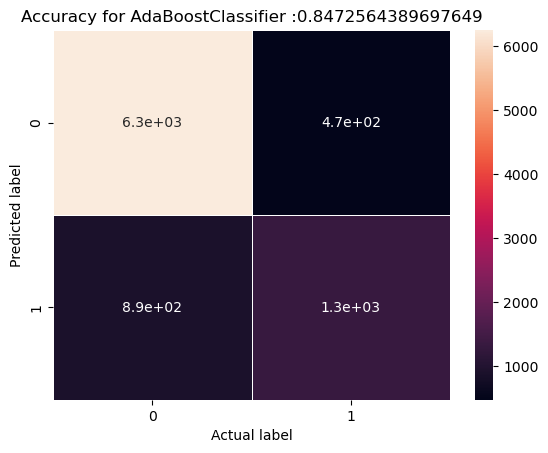

In [88]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,linewidths=.5,annot=True)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
all_sample_title='Accuracy for AdaBoostClassifier :{0}'.format(final_model_cls.score(x_test,y_test))
plt.title(all_sample_title)

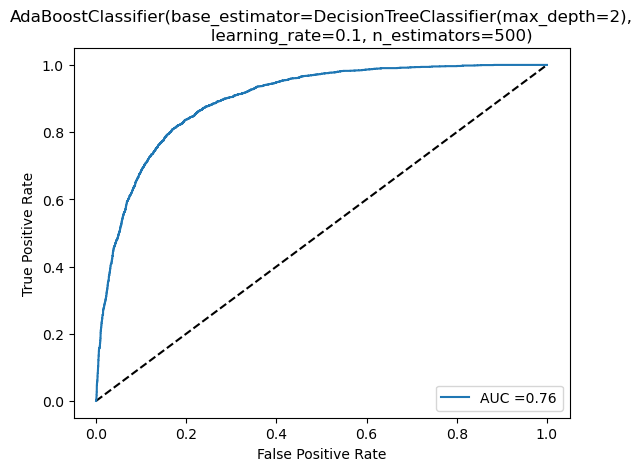

In [78]:
def auc_roc(model):
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
    auc_score = roc_auc_score(y_test, model.predict(x_test))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()
auc_roc(final_model_cls)

In [79]:
import pickle
filename = 'census_classification.pkl'
pickle.dump(final_model_cls,open(filename,'wb'))

In [83]:
original = np.array(y_test)
predicted = np.round(np.array(final_model_cls.predict(x_test)),0)

income_prediction = pd.DataFrame({'Original':original,'Predicted Income Status':predicted}).T
income_prediction

,0,1,2,3,4,5,6,7,8,9,...,8920,8921,8922,8923,8924,8925,8926,8927,8928,8929
Original,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Predicted Income Status,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
